In [1]:
.L src/load_dataset.cpp

In [2]:
.L src/transform.cpp

In [3]:
.L src/track_chain.cpp

In [4]:
.L src/volid.cpp

In [5]:
.L src/plot.cpp

In [6]:
.L src/util.cpp

In [7]:
char const* path {"dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [8]:
auto df = filterT1Events(dataset.df, 0.222).Filter("is_event");  // Filter set at 5% of 4.44 MEV

In [9]:
df = df.Define("trackidF", "trackid[edep_pvt > 0.001]");
df = df.Define("volidF", "volid[edep_pvt > 0.001]");
df = df.Define("edep_pvtF", "edep_pvt[edep_pvt > 0.001]");
df = df.Filter("edep_pvtF.size() != 0");

# Check if the energy distributions change a lot

In [10]:
// Get all the volid relative to the Gamma chain
auto dfTE= df.Define(
    "Egamma_chain",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackidF, &edep_pvtF)"
);
dfTE = dfTE.Filter("Egamma_chain");

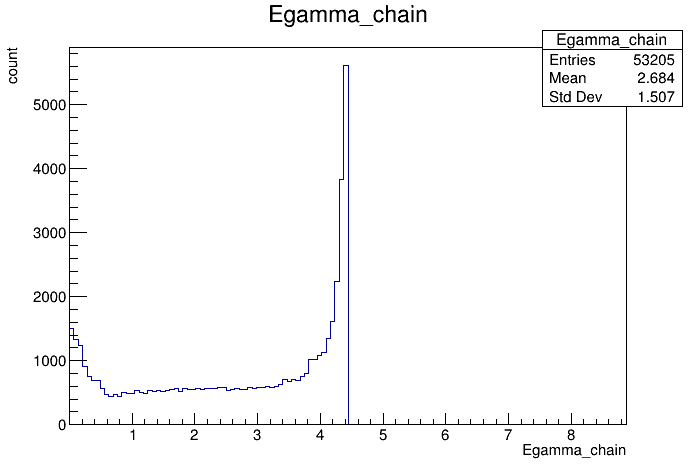

In [11]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfTE.Histo1D("Egamma_chain")->DrawClone();
c.Draw();

In [12]:
// Get all the volid relative to the Gamma chain
auto dfCE = df.Define(
    "Egamma_chain",
    "track_entry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackidF, &edep_pvtF, true)"
);
dfCE = dfCE.Filter("Egamma_chain")

(ROOT::RDF::RInterface &) @0x7f662990c590


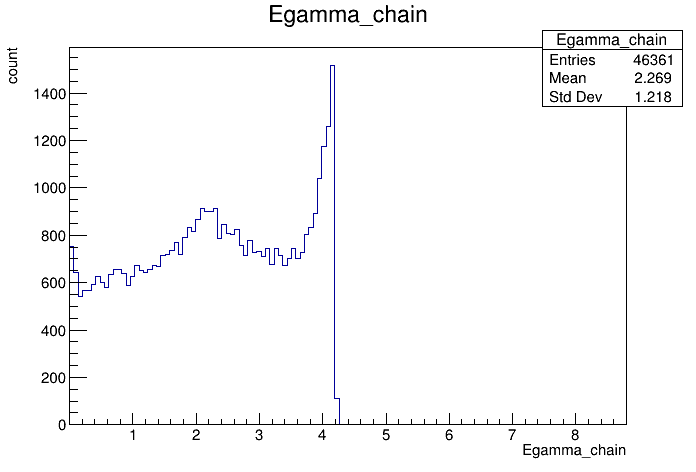

In [13]:
TCanvas c;
// Change filter by true if you wanna see the 0 spike
auto hist = dfCE.Histo1D("Egamma_chain")->DrawClone();
c.Draw();

# Total energy volid

In [14]:
// Get all the volid relative to the Gamma chain
dfTE = dfTE.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackidF, &volidF)"
);

In [15]:
dfTE = dfTE.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfTE = dfTE.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfTE = dfTE.Filter("gammaVolid != -1");

In [16]:
dfTE = dfTE.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfTE = dfTE.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfTE = dfTE.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

## Plot the abolute distance

In [17]:
auto mmax = [](int dx, int dy, int dz){return std::max({std::abs(dx), std::abs(dy), std::abs(dz)});};

In [18]:
dfTE = dfTE.Define("HammingDist", "ROOT::VecOps::abs(xDist) + ROOT::VecOps::abs(yDist) + ROOT::VecOps::abs(zDist)");
dfTE = dfTE.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");
dfTE = dfTE.Define("NeighborDist", "ROOT::VecOps::Map(xDist, yDist, zDist, neightborDistCalc)");

In [19]:
dfTE = dfTE.Define("maxHammingDist", "ROOT::VecOps::Max(HammingDist)");
dfTE = dfTE.Define("maxEuclidDist", "ROOT::VecOps::Max(EuclidDist)");
dfTE = dfTE.Define("maxNeighborDist", "ROOT::VecOps::Max(NeighborDist)");

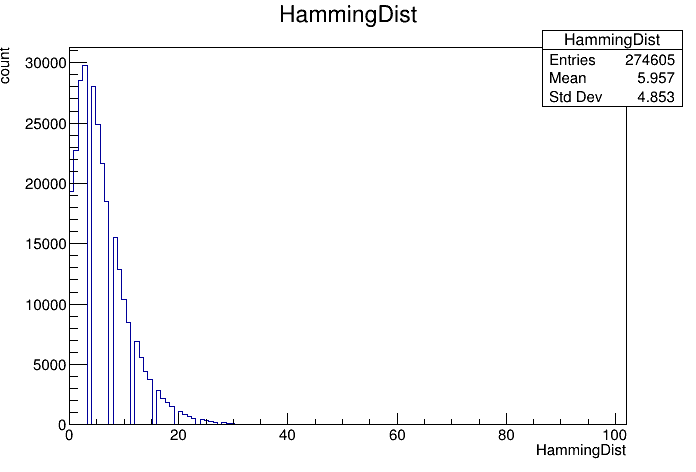

Info in <TCanvas::Print>: pdf file plots/pdf/HammingDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/HammingDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/HammingDist_filtered.png has been created


In [20]:
TCanvas c;
auto hist = dfTE.Histo1D("HammingDist")->DrawClone();
c.Draw();
savePlot(hist, "HammingDist_filtered");

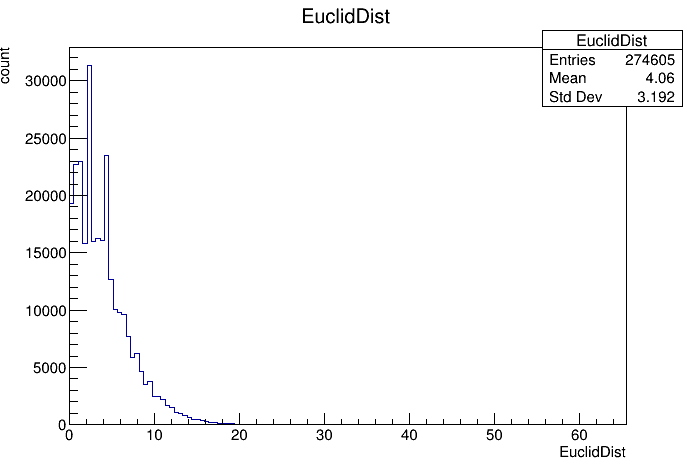

Info in <TCanvas::Print>: pdf file plots/pdf/EuclidDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/EuclidDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/EuclidDist_filtered.png has been created


In [21]:
TCanvas c;
auto hist = dfTE.Histo1D("EuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "EuclidDist_filtered");

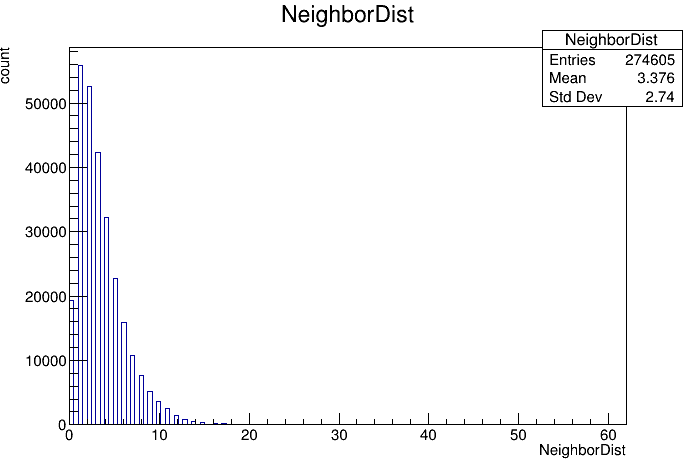

Info in <TCanvas::Print>: pdf file plots/pdf/NeighborDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/NeighborDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/NeighborDist_filtered.png has been created


In [22]:
TCanvas c;
auto hist = dfTE.Histo1D("NeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "NeighborDist_filtered");

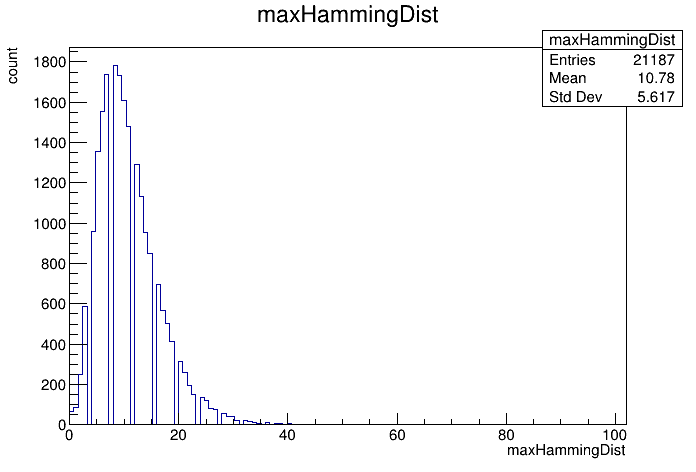

Info in <TCanvas::Print>: pdf file plots/pdf/maxHammingDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxHammingDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxHammingDist_filtered.png has been created


In [23]:
TCanvas c;
auto hist = dfTE.Histo1D("maxHammingDist")->DrawClone();
c.Draw();
savePlot(hist, "maxHammingDist_filtered");

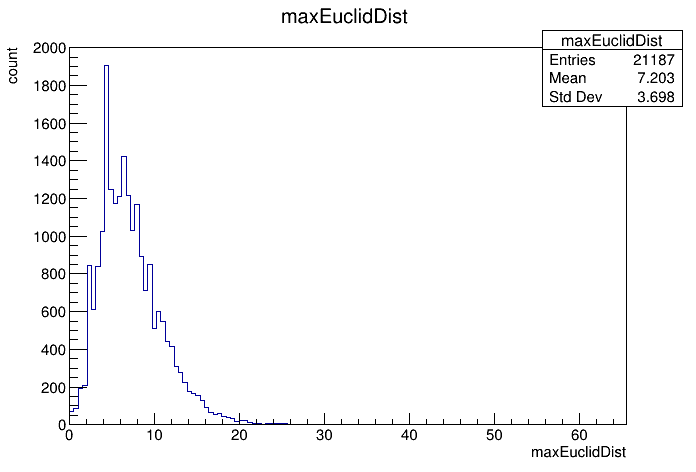

Info in <TCanvas::Print>: pdf file plots/pdf/maxEuclidDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxEuclidDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxEuclidDist_filtered.png has been created


In [24]:
TCanvas c;
auto hist = dfTE.Histo1D("maxEuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "maxEuclidDist_filtered");

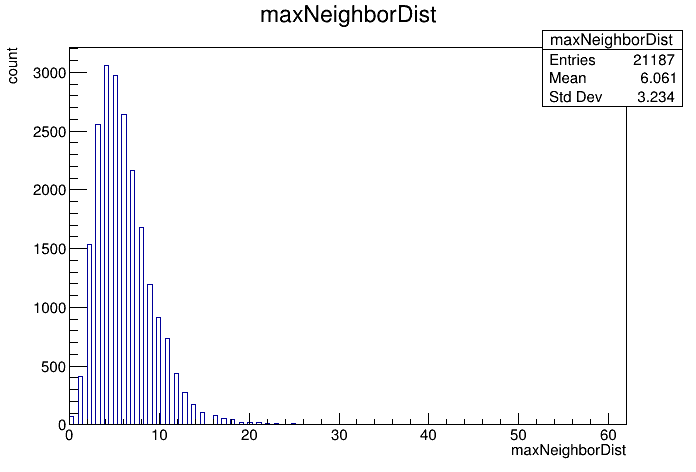

Info in <TCanvas::Print>: pdf file plots/pdf/maxNeighborDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/maxNeighborDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/maxNeighborDist_filtered.png has been created


In [25]:
TCanvas c;
auto hist = dfTE.Histo1D("maxNeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "maxNeighborDist_filtered");

# Compton Energy volid

In [26]:
// Get all the volid relative to the Gamma chain
dfCE = dfCE.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackidF, &volidF, true)"
);

In [27]:
dfCE = dfCE.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfCE = dfCE.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfCE = dfCE.Filter("gammaVolid != -1");

In [28]:
dfCE = dfCE.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfCE = dfCE.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfCE = dfCE.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

## Plot the abolute distance

In [29]:
dfCE = dfCE.Define("HammingDist", "ROOT::VecOps::abs(xDist) + ROOT::VecOps::abs(yDist) + ROOT::VecOps::abs(zDist)");
dfCE = dfCE.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");
dfCE = dfCE.Define("NeighborDist", "ROOT::VecOps::Map(xDist, yDist, zDist, neightborDistCalc)");
dfCE = dfCE.Define("maxHammingDist", "ROOT::VecOps::Max(HammingDist)");
dfCE = dfCE.Define("maxEuclidDist", "ROOT::VecOps::Max(EuclidDist)");
dfCE = dfCE.Define("maxNeighborDist", "ROOT::VecOps::Max(NeighborDist)");

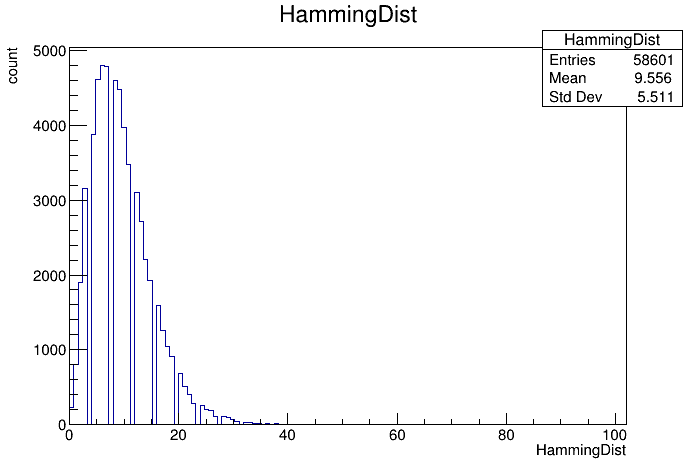

Info in <TCanvas::Print>: pdf file plots/pdf/CEHammingDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEHammingDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEHammingDist_filtered.png has been created


In [30]:
TCanvas c;
auto hist = dfCE.Histo1D("HammingDist")->DrawClone();
c.Draw();
savePlot(hist, "CEHammingDist_filtered");

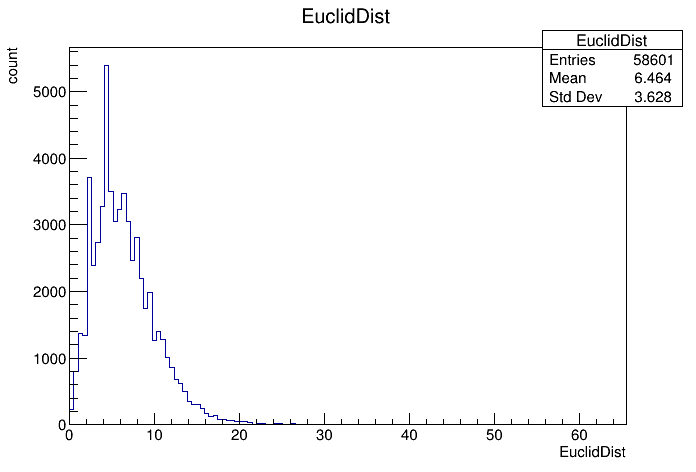

Info in <TCanvas::Print>: pdf file plots/pdf/CEEuclidDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEEuclidDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEEuclidDist_filtered.png has been created


In [31]:
TCanvas c;
auto hist = dfCE.Histo1D("EuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "CEEuclidDist_filtered");

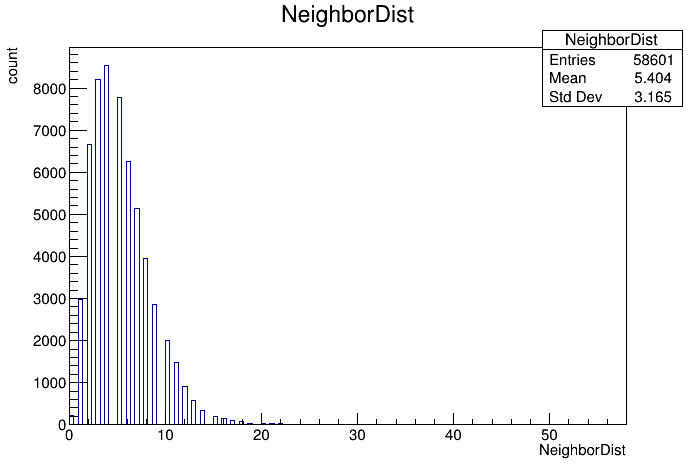

Info in <TCanvas::Print>: pdf file plots/pdf/CENeighborDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CENeighborDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CENeighborDist_filtered.png has been created


In [32]:
TCanvas c;
auto hist = dfCE.Histo1D("NeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "CENeighborDist_filtered");

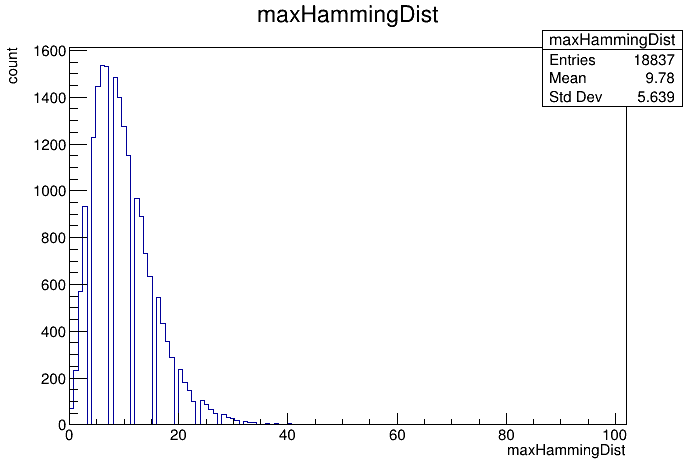

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxHammingDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxHammingDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxHammingDist_filtered.png has been created


In [33]:
TCanvas c;
auto hist = dfCE.Histo1D("maxHammingDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxHammingDist_filtered");

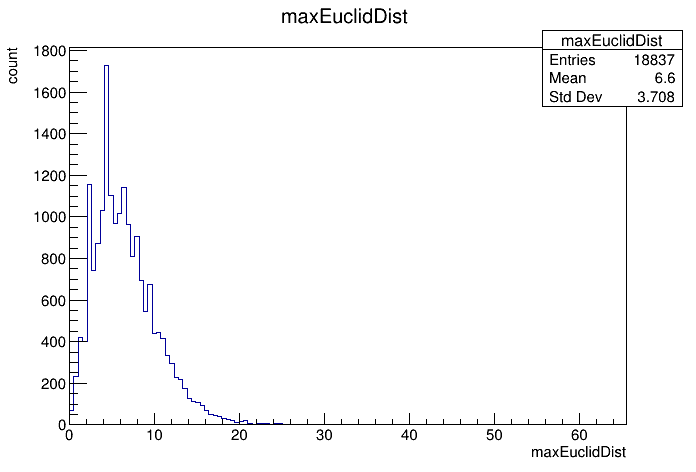

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxEuclidDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxEuclidDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxEuclidDist_filtered.png has been created


In [34]:
TCanvas c;
auto hist = dfCE.Histo1D("maxEuclidDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxEuclidDist_filtered");

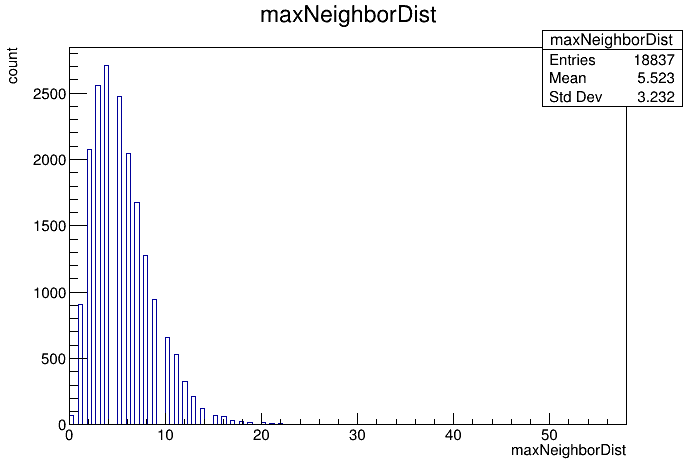

Info in <TCanvas::Print>: pdf file plots/pdf/CEmaxNeighborDist_filtered.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/CEmaxNeighborDist_filtered.pgf has been created
Info in <TCanvas::Print>: png file plots/png/CEmaxNeighborDist_filtered.png has been created


In [35]:
TCanvas c;
auto hist = dfCE.Histo1D("maxNeighborDist")->DrawClone();
c.Draw();
savePlot(hist, "CEmaxNeighborDist_filtered");

# Add energy weigths

In [36]:
dfCE = dfCE.Define("index", "getIndex(&gammaChainVolid, &volid)");
dfCE = dfCE.Define("gammaChainEpvt", "ROOT::VecOps::Take(edep_pvt, index)");

In [37]:
dfTE.Count().GetValue()

(const unsigned long long) 21187


In [38]:
dfTE = dfTE.Define("DistEnergy", "(gammaChainEpvt / 4.44) / 21187");

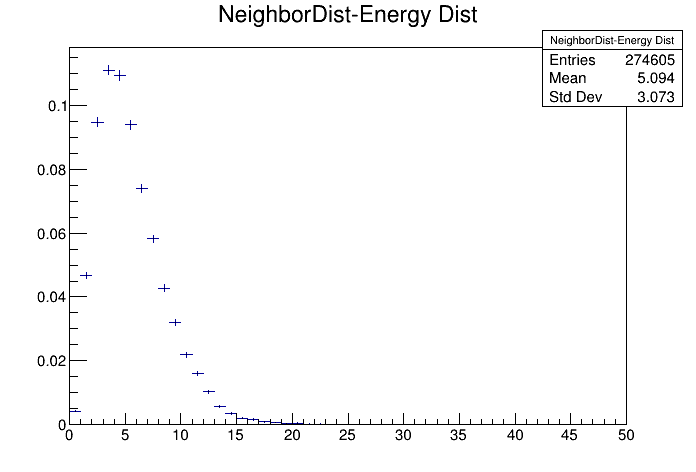

Info in <TCanvas::Print>: pdf file plots/pdf/NeighborhoodDist_weigth.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/NeighborhoodDist_weigth.pgf has been created
Info in <TCanvas::Print>: png file plots/png/NeighborhoodDist_weigth.png has been created


In [39]:
TCanvas c;
auto hist = dfTE.Histo1D<ROOT::RVec<int>, ROOT::RVec<double>>({"NeighborDist-Energy Dist", "NeighborDist-Energy Dist", 50u, 0., 50.0}, "NeighborDist", "DistEnergy")->DrawClone();
c.Draw();
savePlot(hist, "NeighborhoodDist_weigth");

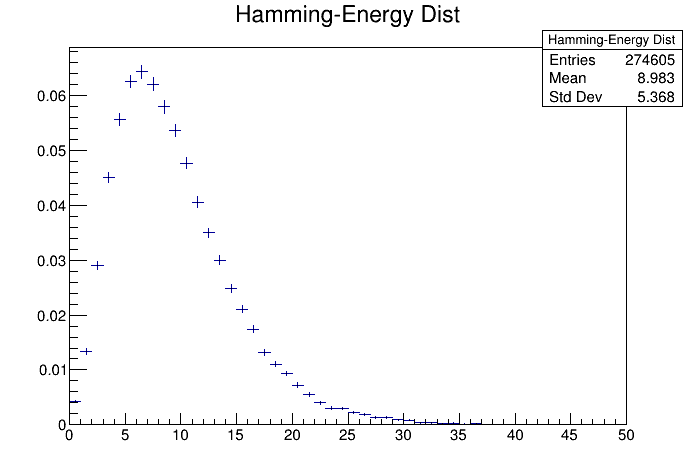

Info in <TCanvas::Print>: pdf file plots/pdf/HammingDist_weigth.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/HammingDist_weigth.pgf has been created
Info in <TCanvas::Print>: png file plots/png/HammingDist_weigth.png has been created


In [40]:
TCanvas c;
auto hist = dfTE.Histo1D<ROOT::RVec<double>, ROOT::RVec<double>>({"Hamming-Energy Dist", "Hamming-Energy Dist", 50u, 0., 50.0}, "HammingDist", "DistEnergy")->DrawClone();
c.Draw();
savePlot(hist, "HammingDist_weigth");

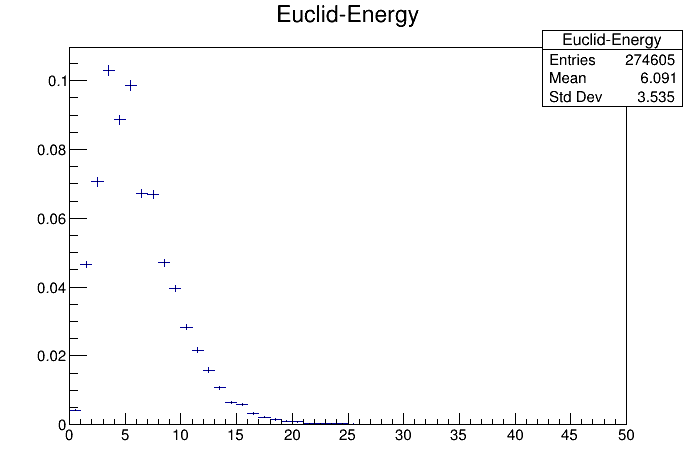

Info in <TCanvas::Print>: pdf file plots/pdf/EuclidDist_weigth.pdf has been created
Info in <TCanvas::Print>: ps file plots/pgf/EuclidDist_weigth.pgf has been created
Info in <TCanvas::Print>: png file plots/png/EuclidDist_weigth.png has been created


In [41]:
TCanvas c;
auto hist = dfTE.Histo1D<ROOT::RVec<double>, ROOT::RVec<double>>({"Euclid-Energy", "Euclid-Energy", 50u, 0., 50.0}, "EuclidDist", "DistEnergy")->DrawClone();
c.Draw();
savePlot(hist, "EuclidDist_weigth");